In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import os

# Exploring Dataset

In [2]:
countries = ['CA','US']

video = []
for cnt in countries:
    path_video = os.path.join(os.environ['HOME'],'data','youtube-trending',f'{cnt}videos.csv')
    video.append(pd.read_csv(
        path_video,
        parse_dates=['trending_date','publish_time'],
        dtype={'title': 'str', 'channel_title': 'str', 'description': 'str'}))
    video[-1].loc[:,'origin'] = cnt
    
video = pd.concat(video)
video.set_index('video_id')
video = video[(~video['video_error_or_removed']) & (~video['ratings_disabled'])]
video[:3]

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,origin
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10 17:00:03+00:00,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...,CA
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13 17:00:00+00:00,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...,CA
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12 19:05:24+00:00,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,CA


In [3]:
video.dtypes

video_id                               object
trending_date                          object
title                                  object
channel_title                          object
category_id                             int64
publish_time              datetime64[ns, UTC]
tags                                   object
views                                   int64
likes                                   int64
dislikes                                int64
comment_count                           int64
thumbnail_link                         object
comments_disabled                        bool
ratings_disabled                         bool
video_error_or_removed                   bool
description                            object
origin                                 object
dtype: object

In [4]:
video.loc[:,'trending_date'] = pd.to_datetime(
    video['trending_date'],
    format='%y.%d.%m')
video.dtypes

video_id                               object
trending_date                  datetime64[ns]
title                                  object
channel_title                          object
category_id                             int64
publish_time              datetime64[ns, UTC]
tags                                   object
views                                   int64
likes                                   int64
dislikes                                int64
comment_count                           int64
thumbnail_link                         object
comments_disabled                        bool
ratings_disabled                         bool
video_error_or_removed                   bool
description                            object
origin                                 object
dtype: object

## Clean text (title, description)

Removing non-English letters and remove videos with short description or title

In [5]:
for tcol in ['title','description']:
    video.loc[:,tcol] = video[tcol].str.replace(
        '[^\x00-\x7F\x80-\xFF\u0100-\u017F\u0180-\u024F\u1E00-\u1EFF]', 
        '', regex=True)
    video.loc[:,tcol] = video[tcol].str.replace(
        r'\\n', '', regex=True)
    video.loc[:,tcol] = video[tcol].astype(str)
    
video = video[video['title'].str.len() > 8]
video[['title','description']]

,title,description
0,Eminem - Walk On Water (Audio) ft. Beyoncé,Eminem's new track Walk on Water ft. Beyoncé i...
1,PLUSH - Bad Unboxing Fan Mail,STill got a lot of packages. Probably will las...
2,"Racist Superman | Rudy Mancuso, King Bach & Le...",WATCH MY PREVIOUS VIDEO SUBSCRIBE https://ww...
3,I Dare You: GOING BALD!?,I know it's been a while since we did this sho...
4,Ed Sheeran - Perfect (Official Music Video),: https://ad.gt/yt-perfect: https://atlanti.cr...
...,...,...
40944,The Cat Who Caught the Laser,The Cat Who Caught the Laser - Aaron's Animals
40945,True Facts : Ant Mutualism,nan
40946,I GAVE SAFIYA NYGAARD A PERFECT HAIR MAKEOVER ...,I had so much fun transforming Safiyas hair in...
40947,How Black Panther Should Have Ended,How Black Panther Should Have EndedWatch More ...


## Distribution of video release dates over time

In [6]:
video.loc[:,'release'] = video['publish_time'].dt.strftime('%Y%m')
video.release

0        201711
1        201711
2        201711
3        201711
4        201711
          ...  
40944    201805
40945    201805
40946    201805
40947    201805
40948    201805
Name: release, Length: 80557, dtype: object

/Users/pataoengineer/opt/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  This is separate from the ipykernel package so we can avoid doing imports until


[Text(0, 0, '200607'),
 Text(1, 0, '200801'),
 Text(2, 0, '200804'),
 Text(3, 0, '200806'),
 Text(4, 0, '200808'),
 Text(5, 0, '200902'),
 Text(6, 0, '200903'),
 Text(7, 0, '200906'),
 Text(8, 0, '200909'),
 Text(9, 0, '200912'),
 Text(10, 0, '201001'),
 Text(11, 0, '201004'),
 Text(12, 0, '201005'),
 Text(13, 0, '201009'),
 Text(14, 0, '201103'),
 Text(15, 0, '201105'),
 Text(16, 0, '201108'),
 Text(17, 0, '201111'),
 Text(18, 0, '201201'),
 Text(19, 0, '201202'),
 Text(20, 0, '201203'),
 Text(21, 0, '201206'),
 Text(22, 0, '201209'),
 Text(23, 0, '201212'),
 Text(24, 0, '201303'),
 Text(25, 0, '201305'),
 Text(26, 0, '201307'),
 Text(27, 0, '201309'),
 Text(28, 0, '201310'),
 Text(29, 0, '201311'),
 Text(30, 0, '201401'),
 Text(31, 0, '201402'),
 Text(32, 0, '201403'),
 Text(33, 0, '201406'),
 Text(34, 0, '201408'),
 Text(35, 0, '201409'),
 Text(36, 0, '201411'),
 Text(37, 0, '201412'),
 Text(38, 0, '201501'),
 Text(39, 0, '201503'),
 Text(40, 0, '201504'),
 Text(41, 0, '201505'),
 T

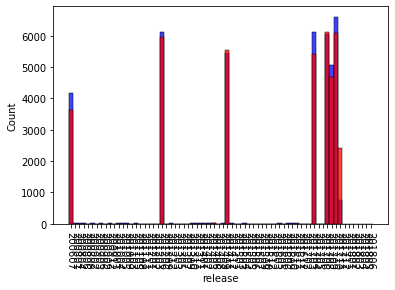

In [7]:
g1 = sns.histplot(video[video.origin=='US'].release, color='blue')
g2 = sns.histplot(video[video.origin=='CA'].release, color='red')
g1.set_xticklabels(labels=np.sort(video.release.unique()), rotation=270)

In [8]:
latest_video = video[video['publish_time'].dt.strftime('%Y%m')>='201711']
latest_video['origin'].value_counts()

US    40326
CA    39845
Name: origin, dtype: int64

## Distribution of engagement

Turns out "views" and "likes" of videos are extremely skewed.

<AxesSubplot:xlabel='origin', ylabel='views'>

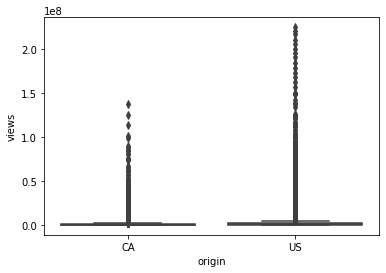

In [9]:
sns.boxplot(data=latest_video, y='views', x='origin')

<AxesSubplot:xlabel='origin', ylabel='likes'>

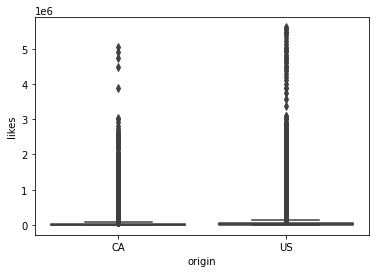

In [10]:
sns.boxplot(data=latest_video, y='likes', x='origin')

/Users/pataoengineer/opt/miniconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
/Users/pataoengineer/opt/miniconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


<AxesSubplot:xlabel='origin', ylabel='logviews'>

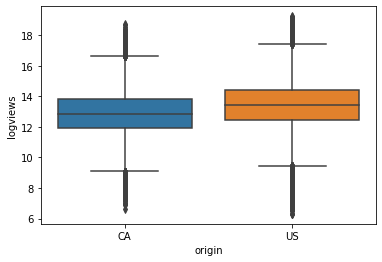

In [11]:
# Log views
latest_video.loc[:,'logviews'] = np.log(latest_video['views'])
sns.boxplot(data=latest_video, y='logviews', x='origin')

<AxesSubplot:xlabel='views', ylabel='Count'>

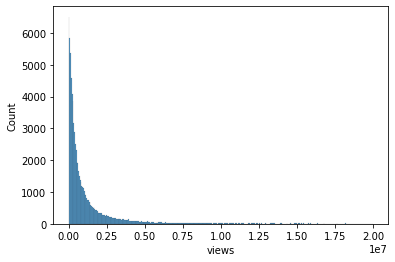

In [12]:
sns.histplot(latest_video.views[latest_video.views < 20e6])

## Engagement 

- is_hated : Videos with "dislikes" >= 0.8 * "likes + dislikes"
- is_pop : Videos with more than 1M views
 

In [13]:
latest_video.loc[:,'is_hated'] = latest_video.loc[:,'dislikes'] >= 0.8*latest_video.loc[:,'likes']
latest_video.loc[:,'is_pop'] = latest_video.loc[:,'views'] >= 1e6

latest_video[['title','is_hated','is_pop','likes','dislikes','views']][:10]

/Users/pataoengineer/opt/miniconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
/Users/pataoengineer/opt/miniconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)
/Users/pataoengineer/opt/miniconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a

,title,is_hated,is_pop,likes,dislikes,views
0,Eminem - Walk On Water (Audio) ft. Beyoncé,False,True,787425,43420,17158579
1,PLUSH - Bad Unboxing Fan Mail,False,True,127794,1688,1014651
2,"Racist Superman | Rudy Mancuso, King Bach & Le...",False,True,146035,5339,3191434
3,I Dare You: GOING BALD!?,False,True,132239,1989,2095828
4,Ed Sheeran - Perfect (Official Music Video),False,True,1634130,21082,33523622
5,Jake Paul Says Alissa Violet CHEATED with LOGA...,False,True,103755,4613,1309699
6,Vanoss Superhero School - New Students,False,True,187464,9850,2987945
7,WE WANT TO TALK ABOUT OUR MARRIAGE,False,False,57534,2967,748374
8,THE LOGANG MADE HISTORY. LOL. AGAIN.,False,True,292837,4123,4477587
9,Finally Sheldon is winning an argument about t...,False,False,4135,976,505161


<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


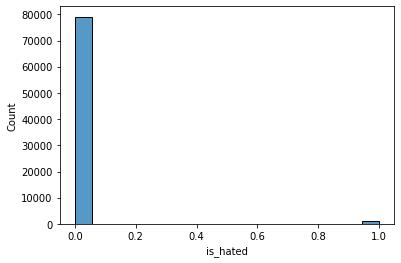

In [14]:
g = sns.histplot(latest_video['is_hated'])

In [15]:
(len(latest_video),
len(latest_video[latest_video['is_hated']]),
len(latest_video[latest_video['is_pop']]))

(80171, 1116, 25985)

## Stratified sampling

based on 'is_pop' attribute

In [16]:
dfstr = []
bins = latest_video['is_pop'].unique().tolist()
N = 5000
for b in bins:
    print(f'Sampling {N} rows from is_pop = {b}')
    dfstr.append(latest_video[latest_video['is_pop']==b].sample(n=N,replace=True))
dfstr = pd.concat(dfstr)

Sampling 5000 rows from is_pop = True
Sampling 5000 rows from is_pop = False


<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


<AxesSubplot:xlabel='is_pop', ylabel='Count'>

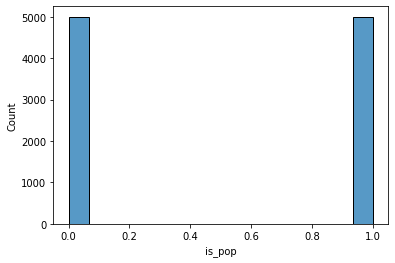

In [17]:
sns.histplot(dfstr['is_pop'])

<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


<AxesSubplot:xlabel='is_hated', ylabel='Count'>

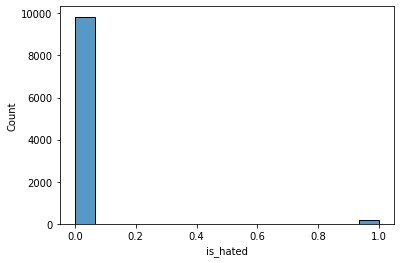

In [18]:
sns.histplot(dfstr['is_hated'])

In [19]:
len(dfstr)

10000

## Explore channel features

In [20]:
channel_size = dfstr['channel_title'].value_counts()
channel_size = channel_size.reset_index(drop=False)
channel_size.columns = ['channel_title','num_videos']
channel_size

,channel_title,num_videos
0,FBE,58
1,Late Night with Seth Meyers,51
2,TheEllenShow,50
3,BuzzFeedVideo,46
4,The Late Show with Stephen Colbert,45
...,...,...
2428,KidBehindACamera,1
2429,DopeLyrics,1
2430,Meghan Markle & Prince Harry News,1
2431,NellyGotBored,1


<AxesSubplot:>

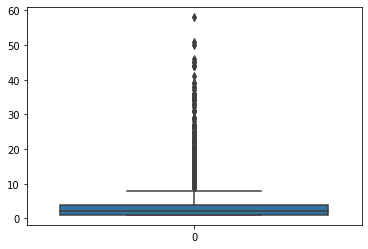

In [21]:
sns.boxplot(data=channel_size['num_videos'])

In [22]:
def bin_size(vn):
    if vn<=10:
        return '0-10'
    elif vn<25:
        return '10-25'
    elif vn<50:
        return '25-50'
    elif vn<100:
        return '50-100'
    else:
        return 'over100'
channel_size.loc[:,'channel_size'] = channel_size['num_videos'].apply(bin_size)

In [23]:
channel_size[:4]

,channel_title,num_videos,channel_size
0,FBE,58,50-100
1,Late Night with Seth Meyers,51,50-100
2,TheEllenShow,50,50-100
3,BuzzFeedVideo,46,25-50


<AxesSubplot:xlabel='channel_size', ylabel='Count'>

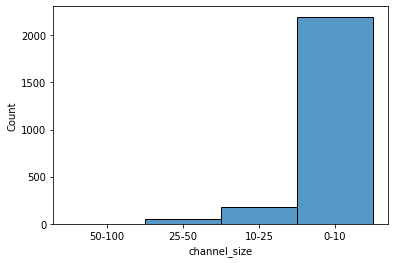

In [24]:
sns.histplot(channel_size, x='channel_size')

In [25]:
dfstr = dfstr.merge(
    channel_size[['channel_size','channel_title']], 
    on=['channel_title'], how='inner')

## Explore text features

In [26]:
dfstr[['channel_size','title','description']]

,channel_size,title,description
0,0-10,YouTube Shooting: Woman Identified As Nasim Ag...,Her father told CBS2 News late Tuesday that he...
1,0-10,YouTube Shooting: Woman Identified As Nasim Ag...,Her father told CBS2 News late Tuesday that he...
2,0-10,YouTube Shooting: Woman Identified As Nasim Ag...,Her father told CBS2 News late Tuesday that he...
3,0-10,SpaceX Launches Falcon Heavy Rocket,SpaceX launched its Falcon Heavy rocket Tuesda...
4,0-10,Thomas Fire Destroys Homes,The Thomas Fire in Ventura County has damaged ...
...,...,...,...
9995,0-10,Salty Canadian Women's Hockey Player Rips Off ...,In the last 4 Winter Olympics the Canadian wom...
9996,0-10,Mega Medley that was supposed to be 5 minutes ...,Broadcasted live on Twitch -- Watch live at ht...
9997,0-10,"Blood Pressure Guidelines Have Changed, and PA...","Actually, don't panic. Or maybe do panic. I do..."
9998,0-10,"Sat Night Live F-Bomb & S-Hole - Rockwell, Jos...","From January 13, 2018 Saturday Night Live epis..."


In [27]:
text = dfstr['title'] + ' ' + dfstr['description']

In [28]:
len(text.str.split(' ').explode().unique())

123126

# Build the first CNN

## Split dataset

In [29]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(dfstr, test_size=0.1)

In [30]:
len(train), len(test)

(9000, 1000)

## Text Vectorisation Layer

In [31]:
# Layer : Text encoder for title + description
VOCAB_SIZE = 2500
SEQ_LEN = 256
import tensorflow as tf

encoder_layer = tf.keras.layers.experimental.preprocessing.TextVectorization(
    max_tokens=VOCAB_SIZE,
    output_sequence_length=SEQ_LEN)

# Adapt encoder to the vocab list from pandas
text_train = train['title'] + ' ' + train['description']
text_train = text_train.str.split(' ').explode().reset_index(drop=True)
encoder_layer.adapt(tf.data.Dataset.from_tensor_slices(
    text_train.values).batch(256))

In [32]:
encoder_layer.get_vocabulary()[:10]

['', '[UNK]', 'the', 'to', 'and', 'on', 'a', 'of', 'in', 'for']

In [33]:
# Layer : text encoder for channel size
channel_encoder_layer = tf.keras.layers.experimental.preprocessing.TextVectorization(
    max_tokens=10, # need to preserve +2 for [UNK, '']
    output_sequence_length=2,
)

# Adapt encoder to channel size list from pandas
channel_sizes = train['channel_size']
channel_encoder_layer.adapt(tf.data.Dataset.from_tensor_slices(
    channel_sizes.values
))

In [34]:
channel_encoder_layer.get_vocabulary()

['', '[UNK]', '010', '1025', '2550', '50100']

## Simple Sequential Model
Using title+description text input only

> Text input -> Encoder -> Embedding -> LSTM -> ReLu

In [39]:
model = tf.keras.models.Sequential()
model.add(encoder_layer)
model.add(tf.keras.layers.Embedding(
    input_dim=len(encoder_layer.get_vocabulary()),
    output_dim=64,
    # Use masking to handle the variable sequence lengths
    mask_zero=True))
model.add(tf.keras.layers.Bidirectional(
    tf.keras.layers.LSTM(64, dropout=0.2)))
model.add(tf.keras.layers.Dense(64, activation='sigmoid'))
model.add(tf.keras.layers.Dense(1))

In [43]:
model.compile(
    loss='binary_crossentropy',
    optimizer=tf.keras.optimizers.Adam(1e-4),
    metrics=['accuracy'])

In [50]:
logdir = os.path.join(os.getcwd(), 'logs')
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

text_train = train['title'] + ' ' + train['description']
assert len(text_train) == len(train['is_pop'])

model.fit(
    text_train,
    train['is_pop'], 
    batch_size=128,
    epochs=10, 
    callbacks=[tensorboard_callback])


Epoch 1/10
71/71 [==============================] - 29s 323ms/step - loss: 0.7197 - accuracy: 0.5042
Epoch 2/10
71/71 [==============================] - 23s 319ms/step - loss: 0.6876 - accuracy: 0.5741
Epoch 3/10
71/71 [==============================] - 23s 327ms/step - loss: 0.6733 - accuracy: 0.6199
Epoch 4/10
71/71 [==============================] - 24s 332ms/step - loss: 0.6296 - accuracy: 0.6728
Epoch 5/10
71/71 [==============================] - 23s 326ms/step - loss: 0.5610 - accuracy: 0.7118
Epoch 6/10
71/71 [==============================] - 24s 334ms/step - loss: 0.5214 - accuracy: 0.7469
Epoch 7/10
71/71 [==============================] - 24s 332ms/step - loss: 0.4935 - accuracy: 0.7676
Epoch 8/10
71/71 [==============================] - 23s 328ms/step - loss: 0.4928 - accuracy: 0.7765
Epoch 9/10
71/71 [==============================] - 25s 358ms/step - loss: 0.4858 - accuracy: 0.7802
Epoch 10/10
71/71 [==============================] - 26s 359ms/step - loss: 0.4577 - accura

In [51]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
text_vectorization (TextVect (None, 256)               0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 256, 64)           160000    
_________________________________________________________________
bidirectional_1 (Bidirection (None, 128)               66048     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 65        
Total params: 234,369
Trainable params: 234,369
Non-trainable params: 0
_________________________________________________________________


In [ ]:
%tensorboard --logdir logs

## Test model in action

In [ ]:
test_text = test['title'] + ' ' + test['description']
test_text[:5]

In [ ]:
list(zip(model.predict(test_text[:5]), test[:5]['is_pop']))

## Multi-input Model Diagram

Now concatenating text input with other numerical features

```
Text input -> Encoder -> Embedding -> LSTM
                                      /
                                     /
Channel size input -> Onehot ----->> concatenate --> ReLU
                                   /
                                  /
Other numerical input ------------
```

In [ ]:
tf.keras.layers.concatenate

In [ ]:
# Input 1 : title + descrption
input_text = tf.keras.layers.Input(shape=(1,), dtype=tf.string, name="text")
t = encoder_layer(input_text)
t = tf.keras.layers.Embedding(
    input_dim=len(encoder_layer.get_vocabulary()),
    output_dim=64,
    mask_zero=True)(t)
t = tf.keras.layers.Bidirectional(
     tf.keras.layers.LSTM(64, dropout=0.2))(t)
t = tf.keras.layers.Flatten()(t)
t = tf.keras.models.Model(inputs=input_text, outputs=t)
t

In [ ]:
# Input 2 : Channel size
input_channel = tf.keras.layers.Input(shape=(1,), dtype=tf.float32, name="channel")
c = tf.keras.layers.Dense(1, activation="relu")(input_channel)
c = tf.keras.models.Model(inputs=input_channel, outputs=c)
c

In [ ]:
# Input 3 : Cnt origin
input_origin = tf.keras.layers.Input(
    shape=(1,), dtype=tf.float32, name="origin")
g = tf.keras.layers.Dense(1, activation='relu')(input_origin)
g = tf.keras.models.Model(inputs=input_origin, outputs=g)
g

In [ ]:
# Concatenated Inputs

concat = tf.keras.layers.concatenate([
    t.output, c.output, g.output
])
# -------------

out = tf.keras.layers.Dense(64, activation='sigmoid')(concat)
out = tf.keras.layers.Dense(1)(out)

model_concat = tf.keras.models.Model(
    inputs=[input_text, input_channel, input_origin],
    outputs=out)

In [ ]:
model_concat.summary()

In [ ]:
model_concat.compile(
    loss='binary_crossentropy',
    optimizer=tf.keras.optimizers.Adam(1e-4),
    metrics=['accuracy'])

In [ ]:
model.trainable

In [ ]:
logdir = os.path.join(os.getcwd(), 'logs')
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

train.loc[:,'txt'] = train['title'] + ' ' + train['description']
train.loc[:,'encoded_channel_size'] = LabelEncoder().fit_transform(train['channel_size'])
train.loc[:,'encoded_origin'] = LabelEncoder().fit_transform(train['origin'])

train.loc[:,'encoded_channel_size'] = train.loc[:,'encoded_channel_size'].astype(float)
train.loc[:,'encoded_origin'] = train.loc[:,'encoded_origin'].astype(float)

session = model_concat.fit(
    [train['txt'], train['encoded_channel_size'], train['encoded_origin']],
    train['is_pop'], 
    batch_size=128,
    epochs=10, 
    callbacks=[tensorboard_callback])

In [ ]:
session.history

In [ ]:
%tensorboard  --logdir logs

## BERT

Try masked language model